In [62]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.under_sampling import NearMiss
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour  
from imblearn.under_sampling import EditedNearestNeighbours #把多分类改成二分类了
from imblearn.under_sampling import RepeatedEditedNearestNeighbours#把多分类改成二分类了
from imblearn.under_sampling import AllKNN



In [67]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from hho import HarrisHawksOptimizer

# Generate a multiple imbalanced classification dataset
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-清洗处理后数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('depression', axis=1)
# Dataset = Dataset.drop('anxiety', axis=1)
Dataset = Dataset.drop('suicide', axis=1)

# y = Dataset['depression']
# x = Dataset.drop('depression', axis=1)

y = Dataset['anxiety']
X = Dataset.drop('anxiety', axis=1)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

# Define a fitness function that evaluates the performance of a subset of features
def fitness_function(X, y, subset):
    X_subset = X[:, subset]
    # Train a classifier using the subset of features
    clf.fit(X_subset, y)
    # Compute the F1 score on the test set
    y_pred = clf.predict(X_test[:, subset])
    score = f1_score(y_test, y_pred, average='weighted')
    return score

# Initialize the Harris Hawks Optimizer
clf = RandomForestClassifier(random_state=42)
hho = HarrisHawksOptimizer(fitness_function, n_hawks=10, n_iter=100)

# Run the optimizer to select 30 important features
selected_features = hho.optimize(X_train, y_train, n_features=30)

# Train a classifier using the selected features
clf.fit(X_train[:, selected_features], y_train)
# Evaluate the performance on the test set
y_pred = clf.predict(X_test[:, selected_features])
score = f1_score(y_test, y_pred, average='weighted')
print('F1 score on test set:', score)

ModuleNotFoundError: No module named 'hho'

In [63]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


原始数据集类别分布： Counter({4.0: 6560, 3.0: 324, 2.0: 82, 1.0: 75})
Counter({1.0: 6560, 2.0: 6560, 3.0: 6560, 4.0: 2500})


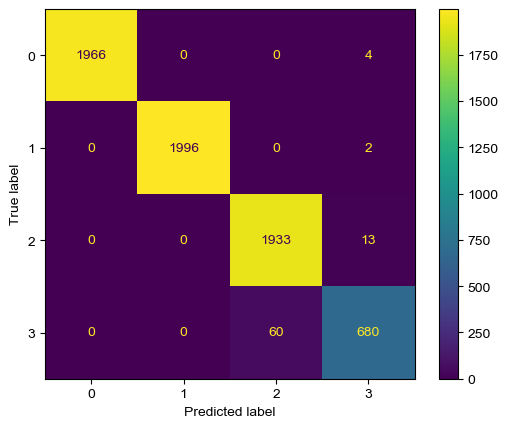

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1970
         2.0       1.00      1.00      1.00      1998
         3.0       0.97      0.99      0.98      1946
         4.0       0.97      0.92      0.95       740

    accuracy                           0.99      6654
   macro avg       0.99      0.98      0.98      6654
weighted avg       0.99      0.99      0.99      6654

Precision: 98.82%
Recall: 98.81%
Random Forest选择的重要特征: ['PANAS1' 'STPQil1' 'PANAS17' 'PANAS19' 'PANAS5' 'OSI9' 'STPQawt2'
 'PANAS3' 'PANAS15' 'PANAS13' 'LSS3' 'OSI7' 'STPQlt13' 'STPQpe7' 'OSI5'
 'STPQai4' 'PANAS7' 'OSI14' 'STPQawt1' 'PANAS16' 'LSS5' 'STPQai17'
 'PBSMHS13' 'STPQpost16' 'STPQpe18' 'PBSMHS11' 'WFCS10' 'STPQai3' 'LSS2'
 'OSI4']


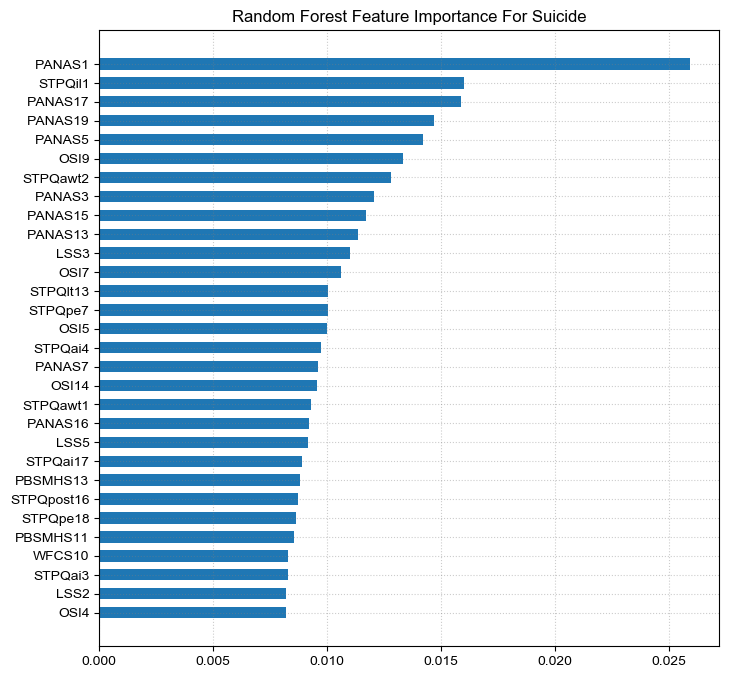

In [64]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/IterativeImputer抑郁量表处理后数据.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/IterativeImputer焦虑量表处理后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-清洗处理后数据.csv"
Dataset = pd.read_csv(fpath)
from imblearn.combine import SMOTEENN

number = 30
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('anxiety', axis=1)
# Dataset = Dataset.drop('suicide', axis=1)

# y = Dataset['depression']
# x = Dataset.drop('depression', axis=1)

# y = Dataset['anxiety']
# x = Dataset.drop('anxiety', axis=1)

y = Dataset['suicide']
x = Dataset.drop('suicide', axis=1)

print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
# cc = ClusterCentroids(
#     estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=20
# )
cc = SMOTEENN(random_state=42)
X_res, y_res = cc.fit_resample(x, y)
print(Counter(y_res))
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=random_state)

#--------------------------balanced bagging classifier-------------
bbc = RandomForestClassifier(n_estimators=100,random_state=random_state)

# bbc = BalancedRandomForestClassifier(random_state=20, n_estimators=200)

# Fit the hybrid classifier on the training data
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(x_train, y_train)
bbc.fit(x_train, y_train)
# import warnings
warnings.filterwarnings('ignore')
# Evaluate the model on the testing data
y_pred = bbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

# evaluate the performance of the model
score = bbc.score(x_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

rf_feature_important = bbc.feature_importances_
rf_x_score = np.sort(rf_feature_important)[::-1]
rf_rank_idx  = np.argsort(rf_feature_important)[::-1]
rf_selected_rank_idx = rf_rank_idx[:number]
rf_selected_rank_names = names_dicts.loc[:, rf_selected_rank_idx]
rf_label = rf_selected_rank_names.values[0, :]

label = rf_selected_rank_names.values[0, :]
Datasetnew = Dataset[label]
# Datasetnew['depression'] = Dataset['depression']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员抑郁量表-重要特征数据.csv",sep=',',index=False)

# Datasetnew['anxiety'] = Dataset['anxiety']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员焦虑表-重要特征数据.csv",sep=',',index=False)

# Datasetnew['suicide'] = Dataset['suicide']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员自杀倾向-重要特征数据.csv",sep=',',index=False)

print("Random Forest选择的重要特征:",rf_label)

# 随机森林可视化
plt.figure(figsize=(8, 8))
plt.barh(rf_label[::-1], rf_x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Random Forest Feature Importance For Suicide")
plt.savefig("前"+str(number)+"名特征")
plt.show()


原始数据集类别分布： Counter({0.0: 3792, 1.0: 2767, 2.0: 367, 3.0: 115})
Counter({3.0: 3792, 2.0: 3785, 1.0: 1723, 0.0: 1036})


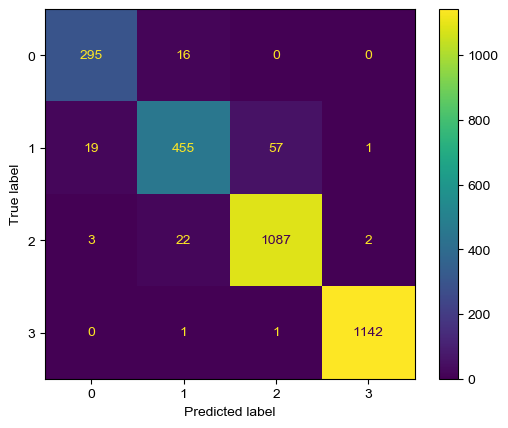

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       311
         1.0       0.92      0.86      0.89       532
         2.0       0.95      0.98      0.96      1114
         3.0       1.00      1.00      1.00      1144

    accuracy                           0.96      3101
   macro avg       0.95      0.94      0.95      3101
weighted avg       0.96      0.96      0.96      3101

Precision: 96.03%
Recall: 96.07%
Random Forest选择的重要特征: ['PANAS17' 'Irritability' 'OSI1' 'PANAS5' 'OSI5' 'OSI7' 'OSI4' 'OSI11'
 'OSI8' 'PANAS19' 'OSI13' 'PANAS1' 'OSI2' 'OSI12' 'PANAS7' 'LSS3' 'OSI6'
 'OSI9' 'OSI16' 'WFCS4' 'OSI3' 'LSS4' 'OSI17' 'PANAS3' 'PANAS6' 'PBSMHS16'
 'PANAS9' 'STPQawt2' 'LSS1' 'PSQI4']


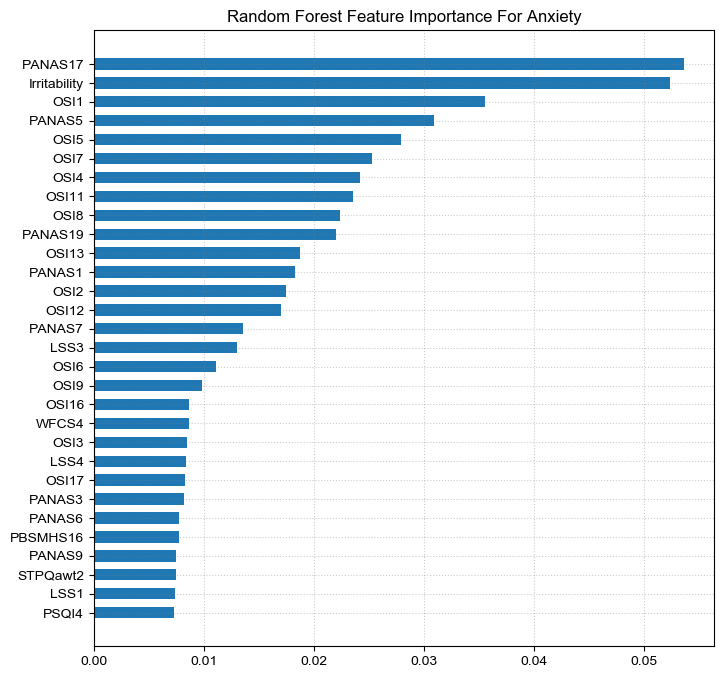

In [65]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/IterativeImputer抑郁量表处理后数据.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/IterativeImputer焦虑量表处理后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-清洗处理后数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('depression', axis=1)
# Dataset = Dataset.drop('anxiety', axis=1)
Dataset = Dataset.drop('suicide', axis=1)

# y = Dataset['depression']
# x = Dataset.drop('depression', axis=1)

y = Dataset['anxiety']
x = Dataset.drop('anxiety', axis=1)

# y = Dataset['suicide']
# x = Dataset.drop('suicide', axis=1)

print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 20
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
# cc = ClusterCentroids(
#     estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
# )
cc = SMOTEENN(random_state=42)
X_res, y_res = cc.fit_resample(x, y)
print(Counter(y_res))
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=random_state)

#--------------------------balanced bagging classifier-------------
bbc = RandomForestClassifier(n_estimators=100,random_state=random_state)

# bbc = BalancedRandomForestClassifier(random_state=20, n_estimators=200)

# Fit the hybrid classifier on the training data
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(x_train, y_train)
bbc.fit(x_train, y_train)
# import warnings
warnings.filterwarnings('ignore')
# Evaluate the model on the testing data
y_pred = bbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

# evaluate the performance of the model
score = bbc.score(x_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

rf_feature_important = bbc.feature_importances_
rf_x_score = np.sort(rf_feature_important)[::-1]
rf_rank_idx  = np.argsort(rf_feature_important)[::-1]
rf_selected_rank_idx = rf_rank_idx[:number]
rf_selected_rank_names = names_dicts.loc[:, rf_selected_rank_idx]
rf_label = rf_selected_rank_names.values[0, :]

label = rf_selected_rank_names.values[0, :]
Datasetnew = Dataset[label]
# Datasetnew['depression'] = Dataset['depression']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员抑郁量表-重要特征数据.csv",sep=',',index=False)

# Datasetnew['anxiety'] = Dataset['anxiety']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员焦虑表-重要特征数据.csv",sep=',',index=False)

# Datasetnew['suicide'] = Dataset['suicide']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员自杀倾向-重要特征数据.csv",sep=',',index=False)

print("Random Forest选择的重要特征:",rf_label)

# 随机森林可视化
plt.figure(figsize=(8, 8))
plt.barh(rf_label[::-1], rf_x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Random Forest Feature Importance For Anxiety")
plt.savefig("前"+str(number)+"名特征")
plt.show()


原始数据集类别分布： Counter({0.0: 6190, 1.0: 760, 2.0: 91})
Counter({2.0: 6190, 1.0: 6171, 0.0: 2339})


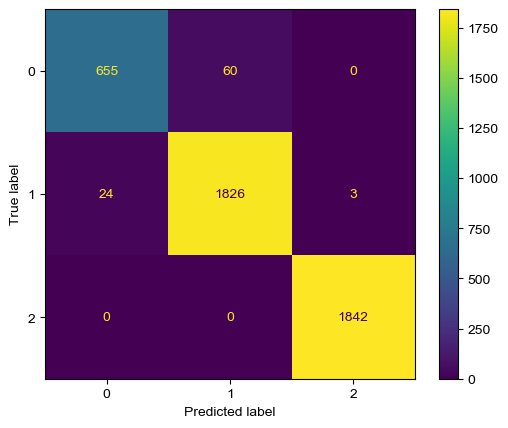

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       715
         1.0       0.97      0.99      0.98      1853
         2.0       1.00      1.00      1.00      1842

    accuracy                           0.98      4410
   macro avg       0.98      0.97      0.97      4410
weighted avg       0.98      0.98      0.98      4410

Precision: 98.02%
Recall: 98.03%
Random Forest选择的重要特征: ['Irritability' 'PANAS5' 'PANAS17' 'OSI5' 'OSI11' 'OSI7' 'PANAS19' 'OSI1'
 'OSI4' 'PANAS7' 'PANAS1' 'OSI8' 'OSI9' 'PANAS11' 'OSI13' 'OSI12' 'OSI3'
 'STPQawt3' 'STPQai3' 'OSI6' 'STPQai1' 'PBSMHS16' 'OSI2' 'OSI10' 'OSI17'
 'WFCS4' 'PANAS13' 'OSI14' 'WFCS6' 'PANAS9']


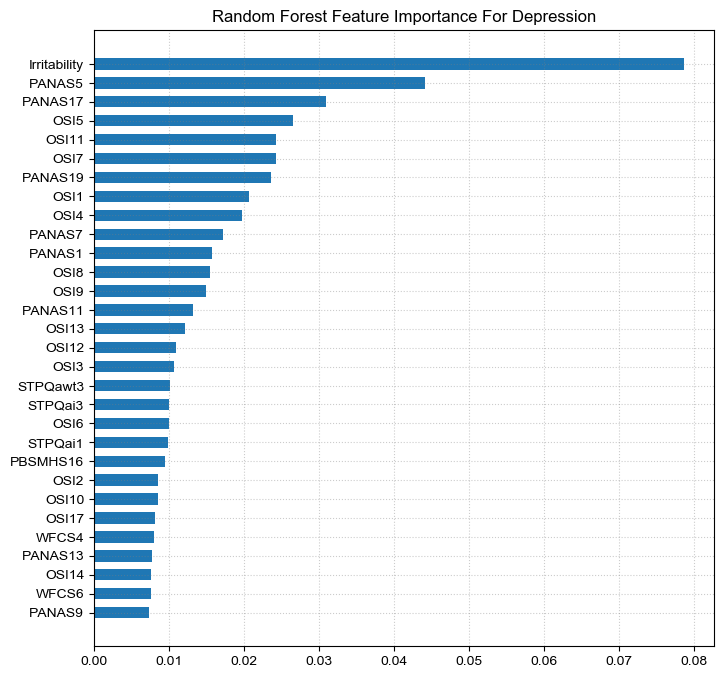

In [66]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/IterativeImputer抑郁量表处理后数据.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/IterativeImputer焦虑量表处理后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-清洗处理后数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
# Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('anxiety', axis=1)
Dataset = Dataset.drop('suicide', axis=1)

y = Dataset['depression']
x = Dataset.drop('depression', axis=1)

# y = Dataset['anxiety']
# x = Dataset.drop('anxiety', axis=1)

# y = Dataset['suicide']
# x = Dataset.drop('suicide', axis=1)

print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 20
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
# cc = ClusterCentroids(
#     estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
# )
cc = SMOTEENN(random_state=42)
X_res, y_res = cc.fit_resample(x, y)
print(Counter(y_res))
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=random_state)

#--------------------------balanced bagging classifier-------------
bbc = RandomForestClassifier(n_estimators=100,random_state=random_state)

# bbc = BalancedRandomForestClassifier(random_state=20, n_estimators=200)

# Fit the hybrid classifier on the training data
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(x_train, y_train)
bbc.fit(x_train, y_train)
# import warnings
warnings.filterwarnings('ignore')
# Evaluate the model on the testing data
y_pred = bbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

# evaluate the performance of the model
score = bbc.score(x_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

rf_feature_important = bbc.feature_importances_
rf_x_score = np.sort(rf_feature_important)[::-1]
rf_rank_idx  = np.argsort(rf_feature_important)[::-1]
rf_selected_rank_idx = rf_rank_idx[:number]
rf_selected_rank_names = names_dicts.loc[:, rf_selected_rank_idx]
rf_label = rf_selected_rank_names.values[0, :]

label = rf_selected_rank_names.values[0, :]
Datasetnew = Dataset[label]
# Datasetnew['depression'] = Dataset['depression']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员抑郁量表-重要特征数据.csv",sep=',',index=False)

# Datasetnew['anxiety'] = Dataset['anxiety']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员焦虑表-重要特征数据.csv",sep=',',index=False)

# Datasetnew['suicide'] = Dataset['suicide']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员自杀倾向-重要特征数据.csv",sep=',',index=False)

print("Random Forest选择的重要特征:",rf_label)

# 随机森林可视化
plt.figure(figsize=(8, 8))
plt.barh(rf_label[::-1], rf_x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Random Forest Feature Importance For Depression")
plt.savefig("前"+str(number)+"名特征")
plt.show()


原始数据集类别分布： Counter({1.0: 6560, 0.0: 481})
Counter({1.0: 1981, 0.0: 132})


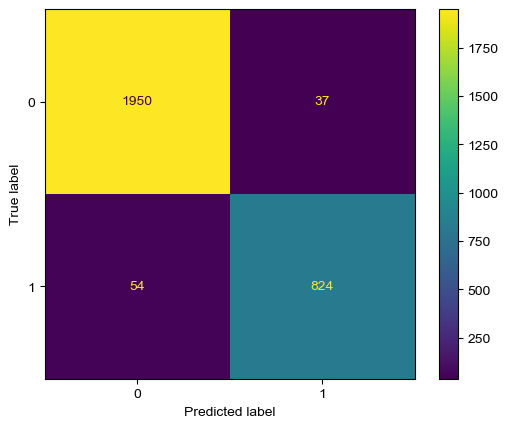

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1987
         1.0       0.96      0.94      0.95       878

    accuracy                           0.97      2865
   macro avg       0.97      0.96      0.96      2865
weighted avg       0.97      0.97      0.97      2865

Precision: 96.81%
Recall: 96.82%
Random Forest选择的重要特征: ['PANAS19' 'PANAS5' 'PANAS17' 'PANAS1' 'PANAS7' 'PANAS3' 'OSI1' 'LSS3'
 'OSI13' 'OSI5' 'OSI8' 'STPQai17' 'OSI11' 'OSI9' 'PANAS15' 'OSI17' 'OSI7'
 'OSI4' 'LSS1' 'PANAS13' 'PBSMHS10' 'OSI15' 'LSS4' 'Irritability' 'IIS5'
 'OSI10' 'PANAS11' 'OSI3' 'OSI14' 'OSI16']


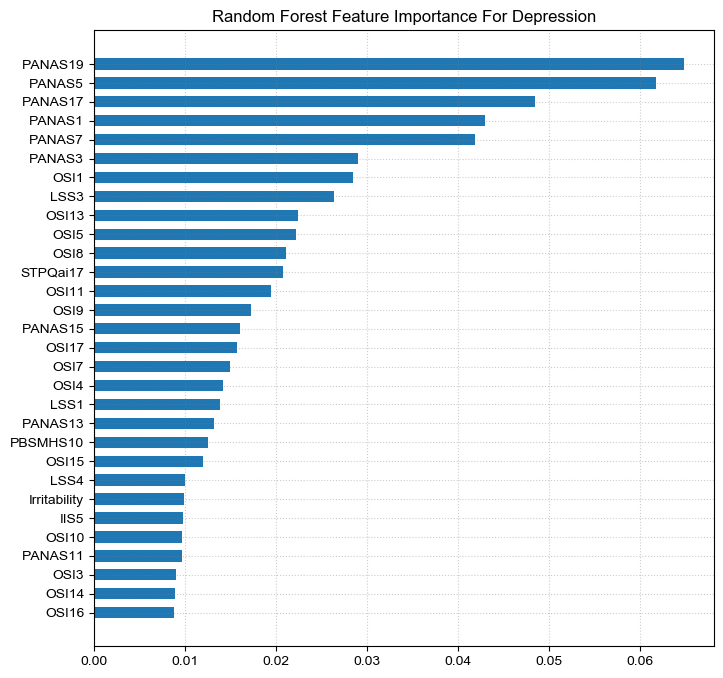

In [57]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/IterativeImputer抑郁量表处理后数据.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/IterativeImputer焦虑量表处理后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-清洗处理后数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('anxiety', axis=1)
# Dataset = Dataset.drop('suicide', axis=1)

# y = Dataset['depression']
# x = Dataset.drop('depression', axis=1)

# y = Dataset['anxiety']
# x = Dataset.drop('anxiety', axis=1)

y = Dataset['suicide']
x = Dataset.drop('suicide', axis=1)

print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
cc = SMOTEENN(random_state=42)
X_res, y_res = cc.fit_resample(x, y)
print(Counter(y_test))
# print(Counter(y_test))
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=random_state)

#--------------------------balanced bagging classifier-------------
bbc = RandomForestClassifier(n_estimators=100,random_state=random_state)

# bbc = BalancedRandomForestClassifier(random_state=20, n_estimators=200)

# Fit the hybrid classifier on the training data
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(x_train, y_train)
bbc.fit(x_train, y_train)
# import warnings
warnings.filterwarnings('ignore')
# Evaluate the model on the testing data
y_pred = bbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

# evaluate the performance of the model
score = bbc.score(x_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

rf_feature_important = bbc.feature_importances_
rf_x_score = np.sort(rf_feature_important)[::-1]
rf_rank_idx  = np.argsort(rf_feature_important)[::-1]
rf_selected_rank_idx = rf_rank_idx[:number]
rf_selected_rank_names = names_dicts.loc[:, rf_selected_rank_idx]
rf_label = rf_selected_rank_names.values[0, :]

label = rf_selected_rank_names.values[0, :]
Datasetnew = Dataset[label]
# Datasetnew['depression'] = Dataset['depression']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员抑郁量表-重要特征数据.csv",sep=',',index=False)

# Datasetnew['anxiety'] = Dataset['anxiety']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员焦虑表-重要特征数据.csv",sep=',',index=False)

# Datasetnew['suicide'] = Dataset['suicide']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员自杀倾向-重要特征数据.csv",sep=',',index=False)

print("Random Forest选择的重要特征:",rf_label)

# 随机森林可视化
plt.figure(figsize=(8, 8))
plt.barh(rf_label[::-1], rf_x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Random Forest Feature Importance For Depression")
plt.savefig("前"+str(number)+"名特征")
plt.show()
